# ch00.04. OpenCV 활용 - haarcascade 객체인식

---
* 날짜:
* 이름:

## 학습내용
    - 이미지에서 객체 인식하기
    - 동영상에서 객체 인식하기

## 학습자료


- [OpenCV 홈페이지](https://opencv.org/)

- [OpenCV-pythoin Documentation](https://opencv-python.readthedocs.io/en/latest/)

- [face-recognition](https://face-recognition.readthedocs.io/en/latest/readme.html#features)


## 개념정리
---

![](https://github.com/yebiny/Image-Segmentation-TF2/blob/main/imgs/seg_type.png?raw=true)

* 어려운것 : 학습하는 거
* 쉬운 거 : 학습된걸 가져다 쓰는거

## face recognition를 이용한 얼굴탐지
---



#### **세팅**

```
! pip install face_recognition
```

In [1]:
! pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 25 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=aa9409ae4841a4f2950a5bf80f0407242679130cac4753335815f1362e4610b1
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
import face_recognition as fr
import cv2
import matplotlib.pyplot as plt


#### **예측**

In [12]:
f_path = 'p2.JPG'
# 전처리
img = fr.load_image_file(f_path)
pred = fr.face_locations(img)
print(pred, len(pred))

[(50, 101, 86, 65)] 1


#### **결과 시각화**

* return : (y1, x2, y2, x1)

50 101 86 65


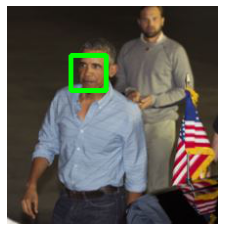

In [14]:
# 왼쪽 위 좌표 = 시작좌표 (x1, y1)
# 오른쪽 아래 좌표 = 끝좌표 (x2, y2)
for (y1, x2, y2, x1) in pred:
  print(y1, x2, y2, x1)
  #사각형그리기
  cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0),3)
plt.imshow(img)
plt.axis('off')
plt.show()

## OpenCV를 이용한 얼굴탐지
---

### **Harr Feature Selection**

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FCGrST%2FbtqwozewRoL%2F97TeD7AXg37r84HSrpJ7n0%2Fimg.png)

[참고블로그](https://webnautes.tistory.com/1352)

### | 이미지에 적용하기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

#### **세팅**

필요 파일
```
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'
```

파일 위치
```
- opencv
  - data
    - haarcascades
```

In [22]:
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'
f_path =  'p3.png'

In [23]:
# 분류기 객체 생성 (2개)
face_model = cv2.CascadeClassifier()
eyes_model = cv2.CascadeClassifier()


In [24]:
# 파라미터를 객체에 로드
face_model.load(cv2.samples.findFile(face_cascade_name))

True

In [25]:
eyes_model.load(cv2.samples.findFile(eyes_cascade_name))

True

#### **전처리**

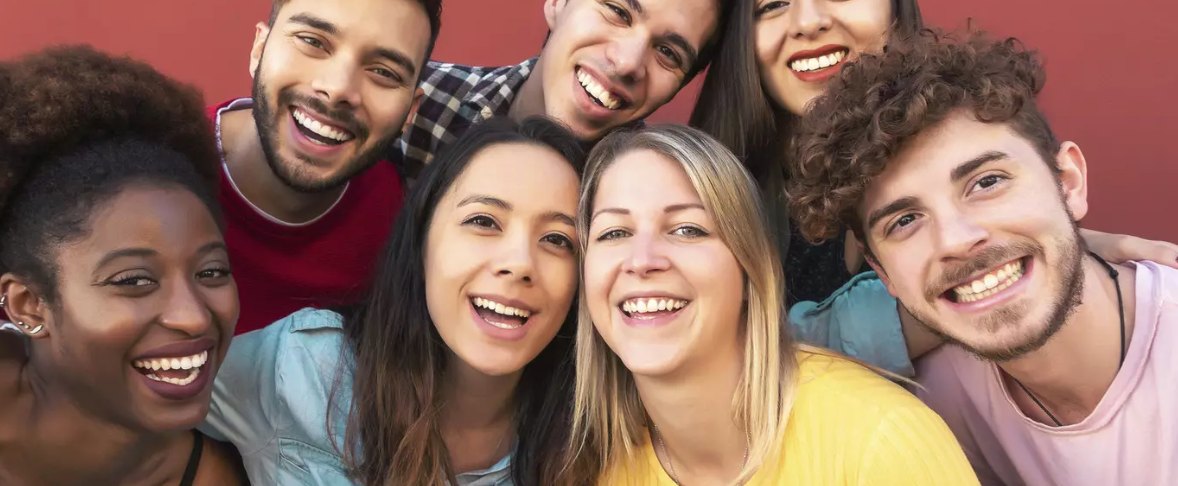

In [26]:
img = cv2.imread(f_path)
cv2_imshow(img)

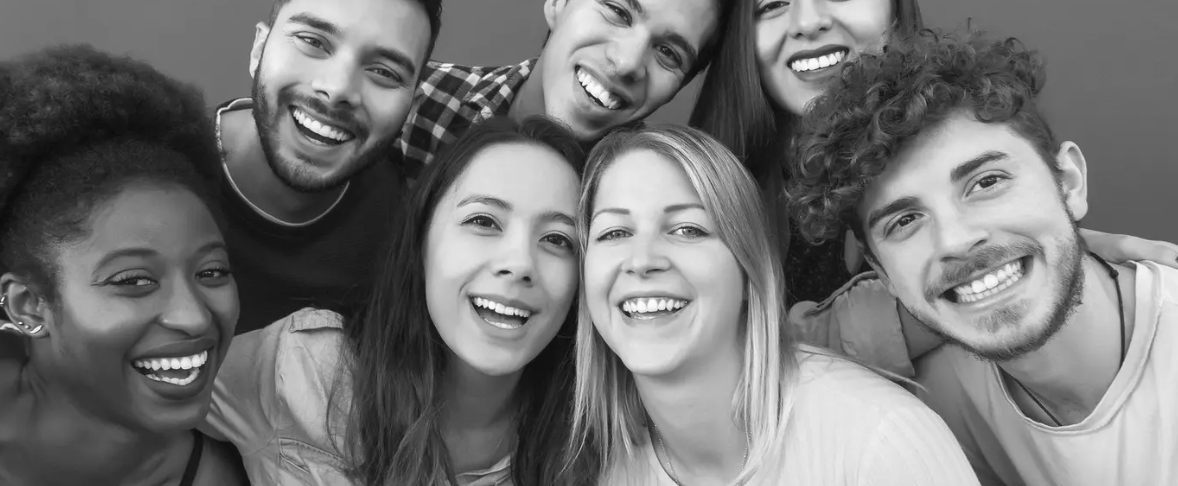

In [27]:
# 1채널(흑백) 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

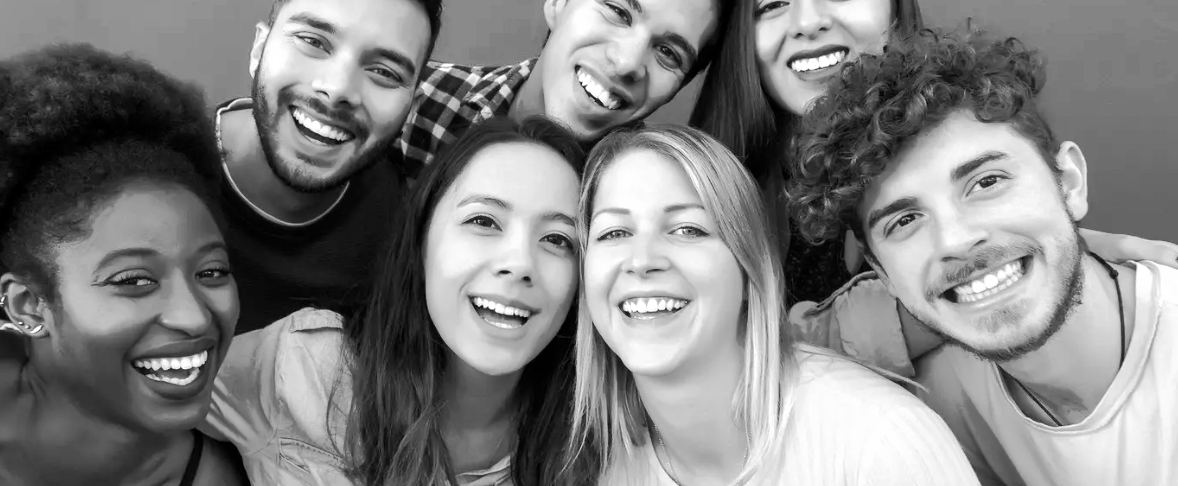

In [28]:
hist = cv2.equalizeHist(gray)
cv2_imshow(hist)

#### **예측**


In [29]:
pred = face_model.detectMultiScale(hist)
print(pred)

[[416 153 201 201]
 [559 160 183 183]
 [ 63 197 212 212]]


* result : (x1, y1, w, h)

In [30]:
x, y, w, h = pred[0]
print(x,y,w,h)

416 153 201 201


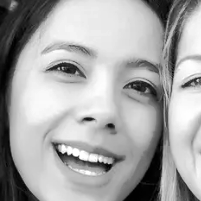

In [31]:
# 좌표 부분만 크롭
croped = hist[y:y+h,x:x+w] # 행:y, 열:x
cv2_imshow(croped)

In [32]:
# 눈 찾는 모델
pred_eyes = eyes_model.detectMultiScale(croped)
print(pred_eyes)

[[117  66  43  43]
 [ 44  46  46  46]]


In [33]:
x, y, w, h = pred_eyes[0]
print(x, y, w, h)

117 66 43 43


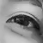

In [34]:
eye = croped[y:y+h, x:x+w]
cv2_imshow(eye)

#### **함수화**

In [41]:
def path2detect(path):
  #전처리
  org_img = cv2.imread(path)
  img = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY) #흑백
  img = cv2.equalizeHist(img)  #더 정확하게

  # 예측 및 시각화
  face_preds = face_model.detectMultiScale(img) # 얼굴인식
  for (x,y,w,h) in face_preds:   # 얼굴마다
    print(f'face:{x},{y},{w},{h}') # 좌표 출력
    cv2.rectangle(org_img, (x,y),(x+w,y+h),(255,0,0),3) # 바운딩 박스 그리기
    face = img[y:y+h, x:x+w] # 눈 인식을 위한 얼굴 크롭
    
    eyes_preds = eyes_model.detectMultiScale(face) # 눈 인식
    for (x2, y2, w2, h2) in eyes_preds: # 눈 마다
      print(f'eyes:{x2},{y2},{w2},{h2}') # 좌표출력
      center = (x+x2+w2//2, y+y2+h2//2) # 원본 이미지에 대한 좌표
      radius = int(round((w2+h2)*0.25)) # 반지름
      cv2.circle(org_img, center, radius, (0,255,0),3)
  cv2_imshow(org_img)


* 함수사용

face:416,153,201,201
eyes:117,66,43,43
eyes:44,46,46,46
face:559,160,183,183
eyes:103,47,49,49
eyes:37,54,42,42
face:63,197,212,212
eyes:43,56,55,55
eyes:120,54,46,46


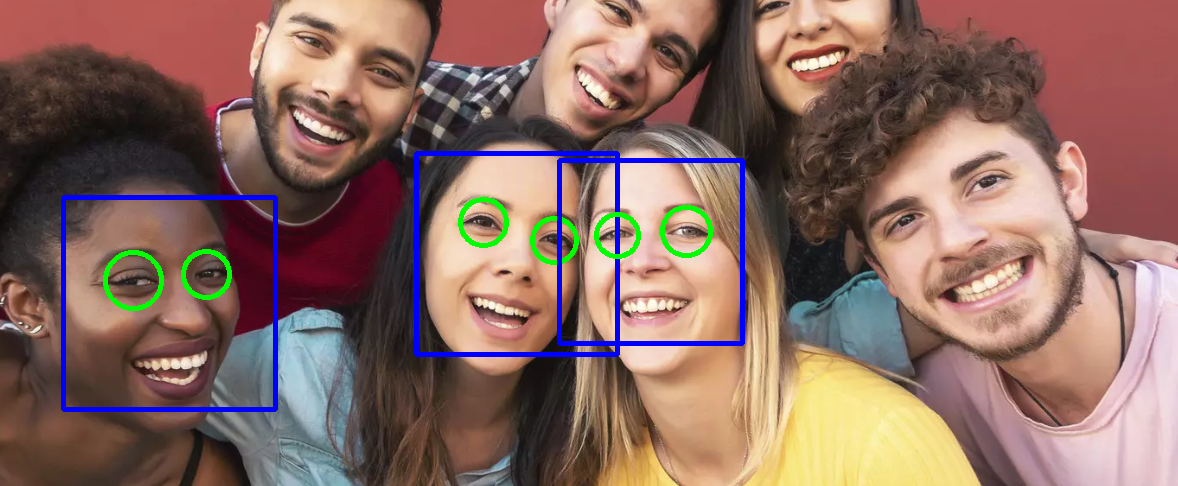

In [42]:
path2detect('p3.png')

### | 비디오에 적용하기

#### **세팅**


In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

In [9]:
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

In [10]:
# 분류기 객체 생성 (2개)
face_model = cv2.CascadeClassifier()
eyes_model = cv2.CascadeClassifier()


In [11]:
# 파라미터를 객체에 로드
face_model.load(cv2.samples.findFile(face_cascade_name))

True

In [12]:
eyes_model.load(cv2.samples.findFile(eyes_cascade_name))

True

#### **함수화**

In [13]:
def frame2detect(frame):
  IPython.display.clear_output(wait=True) #출력결과 매번 지워줌
  #전처리
  img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #흑백
  img = cv2.equalizeHist(img)  #더 정확하게

  # 예측 및 시각화
  face_preds = face_model.detectMultiScale(img) # 얼굴인식
  for (x,y,w,h) in face_preds:   # 얼굴마다
    print(f'face:{x},{y},{w},{h}') # 좌표 출력
    cv2.rectangle(frame, (x,y),(x+w,y+h),(255,0,0),3) # 바운딩 박스 그리기
    face = img[y:y+h, x:x+w] # 눈 인식을 위한 얼굴 크롭
    
    eyes_preds = eyes_model.detectMultiScale(face) # 눈 인식
    for (x2, y2, w2, h2) in eyes_preds: # 눈 마다
      print(f'eyes:{x2},{y2},{w2},{h2}') # 좌표출력
      center = (x+x2+w2//2, y+y2+h2//2) # 원본 이미지에 대한 좌표
      radius = int(round((w2+h2)*0.25)) # 반지름
      cv2.circle(frame, center, radius, (0,255,0),3)
  cv2_imshow(frame)


face:41,70,55,55


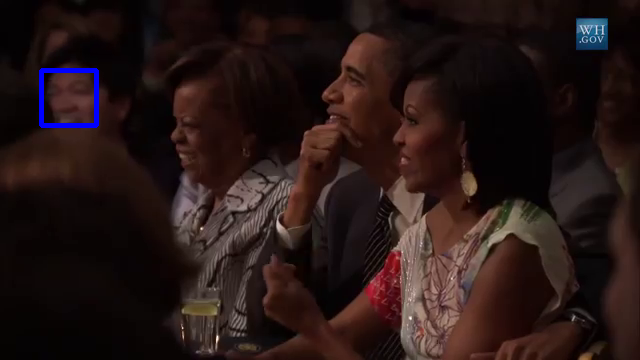

None
No frame !


In [14]:
# 경로로부터 비디오의 프레임 얻기
cap = cv2.VideoCapture('/content/short_hamilton_clip.mp4') # 비디오 캡처
while True:
  _, frame = cap.read()# 캡쳐로부터 비디오 프레임 얻기
  print(frame)
  if frame is None: # 프레임 끝나면 종료
    print('No frame !')
    break
  frame2detect(frame)

## 과제
---



### **과제 01**

[히스토그램](https://opencv-python.readthedocs.io/en/latest/doc/19.imageHistograms/imageHistograms.html)

[히스토그램 균일화](https://opencv-python.readthedocs.io/en/latest/doc/20.imageHistogramEqualization/imageHistogramEqualization.html)


In [108]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

In [101]:
f_path = 'p2.JPG'
img = cv2.imread(f_path)

In [102]:
hist = cv2.calcHist([img],[1],None,[256],[0,256])

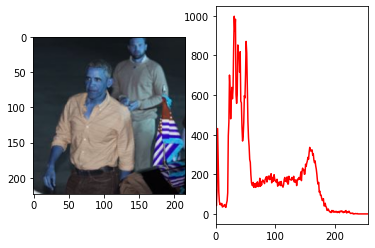

In [103]:
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

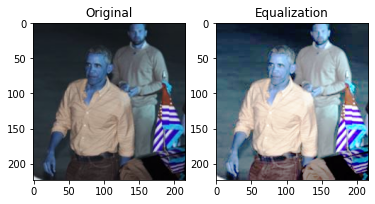

In [112]:
# 균일화
f_path = 'p2.JPG'
img = cv2.imread(f_path)

hist, bins = np.histogram(img.flatten(), 256,[0,256])

cdf = hist.cumsum()
#cdf 값이 0인건 마스크처리
cdf_m = np.ma.masked_equal(cdf,0)

#History Equalization 공식
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(img2),plt.title('Equalization')
plt.show()

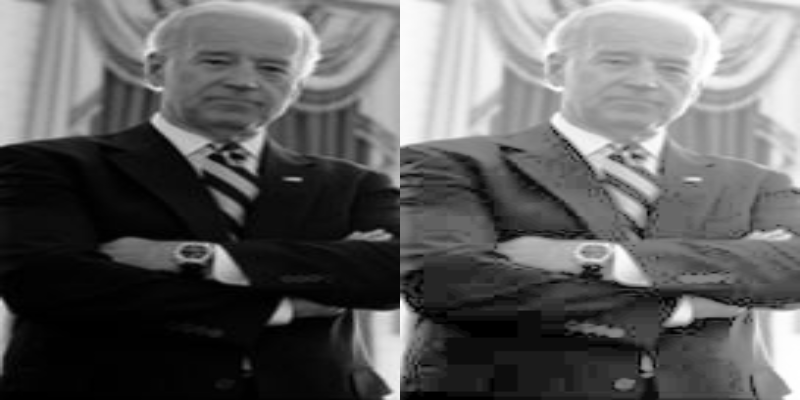

In [121]:
# openCV에서 균일화
f_path = 'p1.JPG'
img = cv2.imread(f_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.equalizeHist(gray)
img = cv2.resize(gray,(400,400))
img2 = cv2.resize(img2,(400,400))

dst = np.hstack((img, img2))
cv2_imshow(dst)
cv2.waitKey()
cv2.destroyAllWindows()

### **과제 02**
```
- haarcascade_smile.xml #웃는거
- haarcascade_upperbody.xml #몸통
```

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

In [43]:
smile_cascade_name = 'haarcascade_smile.xml'
body_cascade_name = 'haarcascade_fullbody.xml'

In [44]:
# 분류기 객체 생성 (2개)
smile_model = cv2.CascadeClassifier()
body_model = cv2.CascadeClassifier()

In [45]:
# 파라미터를 객체에 로드
smile_model.load(cv2.samples.findFile(smile_cascade_name))
body_model.load(cv2.samples.findFile(body_cascade_name))

True

In [50]:
def path2detect(path):
  #전처리
  org_img = cv2.imread(path)
  img = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY) #흑백
  img = cv2.equalizeHist(img)  #더 정확하게

  # 예측 및 시각화
  smile_preds = smile_model.detectMultiScale(img) # 얼굴인식
  for (x,y,w,h) in smile_preds:   # 얼굴마다
    print(f'smile:{x},{y},{w},{h}') # 좌표 출력
    center = (x+x+w//2, y+y+h//2) 
    radius = int(round((w+h)*0.25)) 
    cv2.circle(org_img, center, radius, (0,255,0),3)
    
    body_preds = body_model.detectMultiScale(img) # 눈 인식
    for (x2, y2, w2, h2) in body_preds: # 눈 마다
      print(f'body:{x2},{y2},{w2},{h2}') # 좌표출력
      cv2.rectangle(org_img, (x2,y2),(x2+w2,y2+h2),(0,0,255),3)
  cv2_imshow(org_img)

smile:6,40,40,20
body:640,215,67,135
body:454,289,36,73
body:596,311,22,44
smile:39,45,43,21
body:640,215,67,135
body:454,289,36,73
body:596,311,22,44
smile:509,50,45,23
body:640,215,67,135
body:454,289,36,73
body:596,311,22,44
smile:574,53,39,19
body:640,215,67,135
body:454,289,36,73
body:596,311,22,44
smile:390,30,88,44
body:640,215,67,135
body:454,289,36,73
body:596,311,22,44
smile:346,37,80,40
body:640,215,67,135
body:454,289,36,73
body:596,311,22,44
smile:79,37,91,46
body:640,215,67,135
body:454,289,36,73
body:596,311,22,44
smile:152,50,52,26
body:640,215,67,135
body:454,289,36,73
body:596,311,22,44
smile:597,41,104,52
body:640,215,67,135
body:454,289,36,73
body:596,311,22,44
smile:390,13,274,137
body:640,215,67,135
body:454,289,36,73
body:596,311,22,44
smile:166,93,104,52
body:640,215,67,135
body:454,289,36,73
body:596,311,22,44
smile:7,94,40,20
body:640,215,67,135
body:454,289,36,73
body:596,311,22,44
smile:510,95,84,42
body:640,215,67,135
body:454,289,36,73
body:596,311,22,44
s

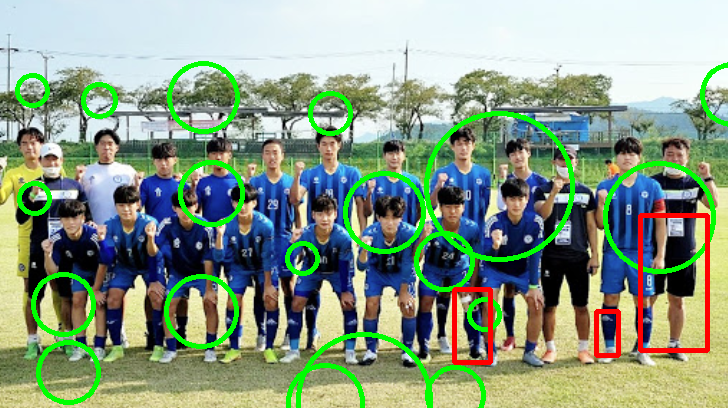

In [51]:
path2detect('p4.png')